Saving Plant_2_Generation_Data.csv to Plant_2_Generation_Data (1).csv
Saving Plant_2_Weather_Sensor_Data.csv to Plant_2_Weather_Sensor_Data (1).csv
Saving Plant_1_Weather_Sensor_Data.csv to Plant_1_Weather_Sensor_Data (1).csv
Saving Plant_1_Generation_Data.csv to Plant_1_Generation_Data (1).csv
*
This dataset has 68778 rows and 7 columns.
-------------------------------------------
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  in

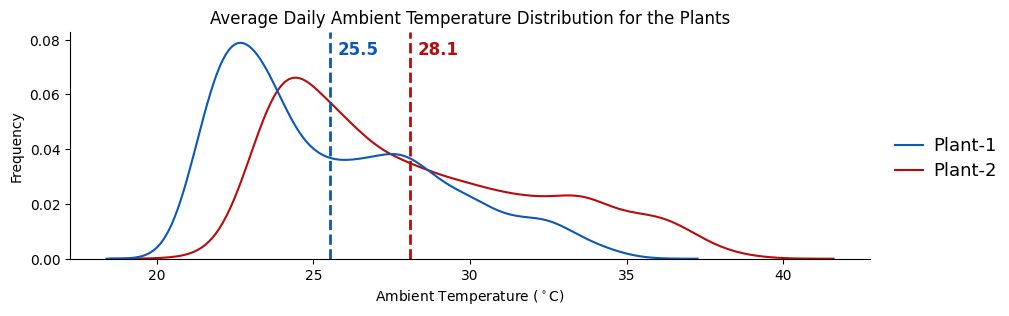

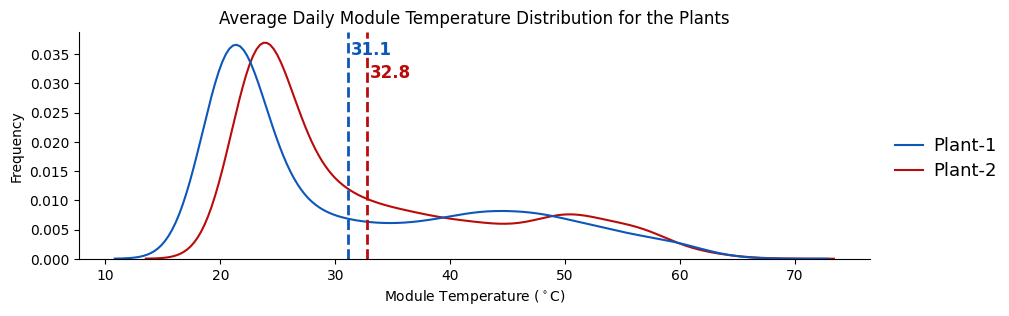

        DATE   PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
0 2020-05-15  4135001.0            27.430823           32.582964     0.204699
1 2020-05-16  4135001.0            26.780538           31.858851     0.211951
Correlation factor for ambient and module temperature for Plant-1 are: 0.891


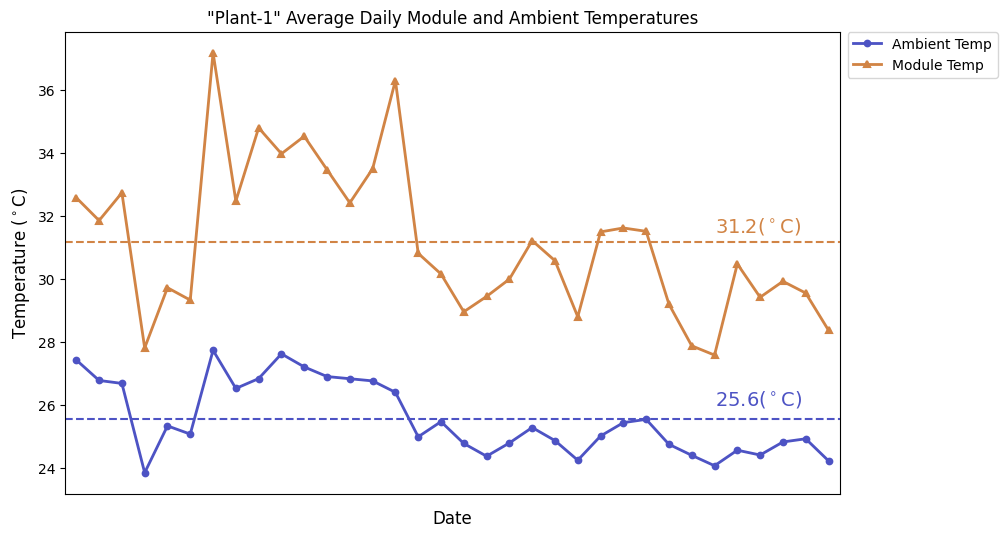

Correlation factor for ambient and module temperatures for Plant-2 are: 0.965


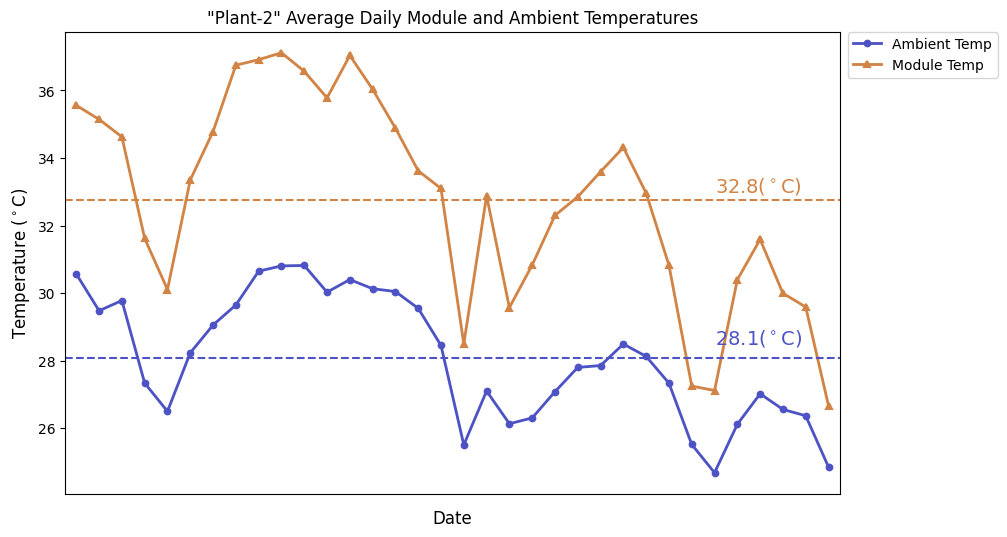

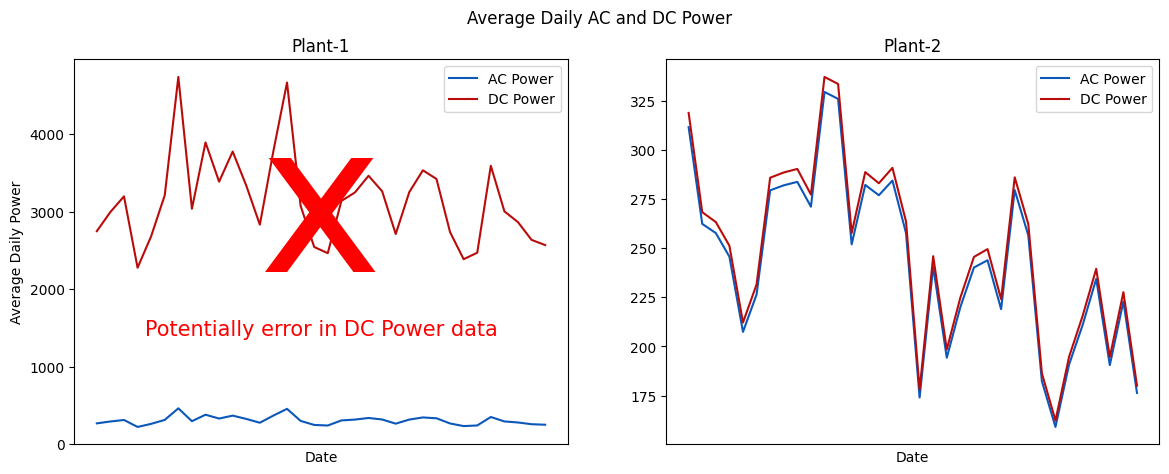

Average daily yield for Plant-1 is: 7196.59
Average daily yield for Plant-2 is: 5949.21
The average daily yield for Plant-1 is 21.0% higher than Plant-2


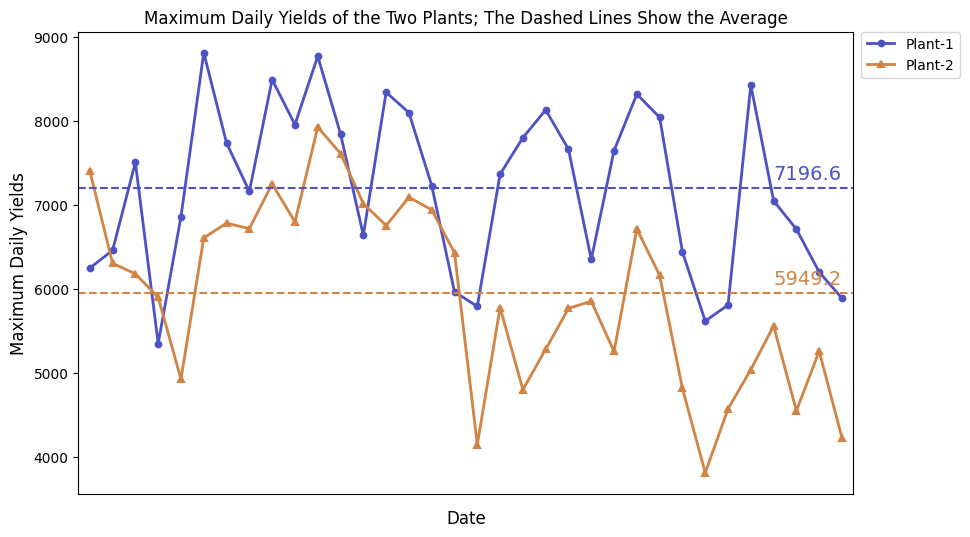

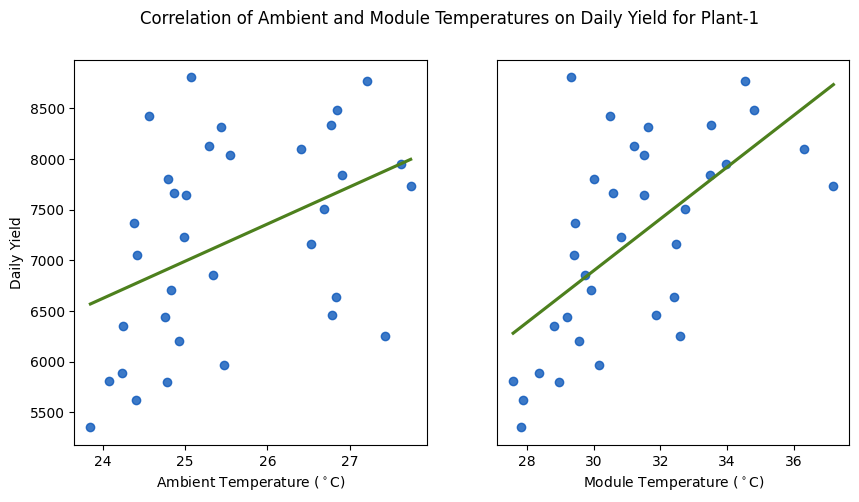

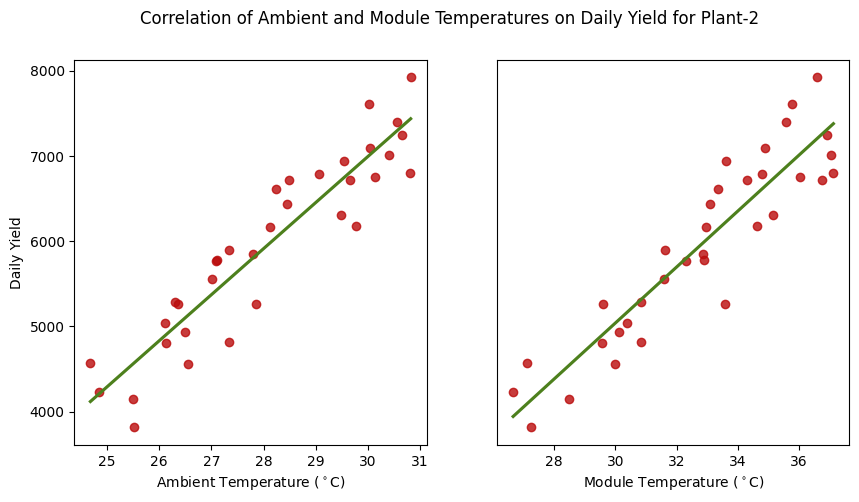

Plant-1
-----
Correlation between daily yield and ambient temperature: 0.426
Correlation between daily yield and module temperature: 0.616
Plant-2
-----
Correlation between daily yield and ambient temperature: 0.927
Correlation between daily yield and module temperature: 0.92


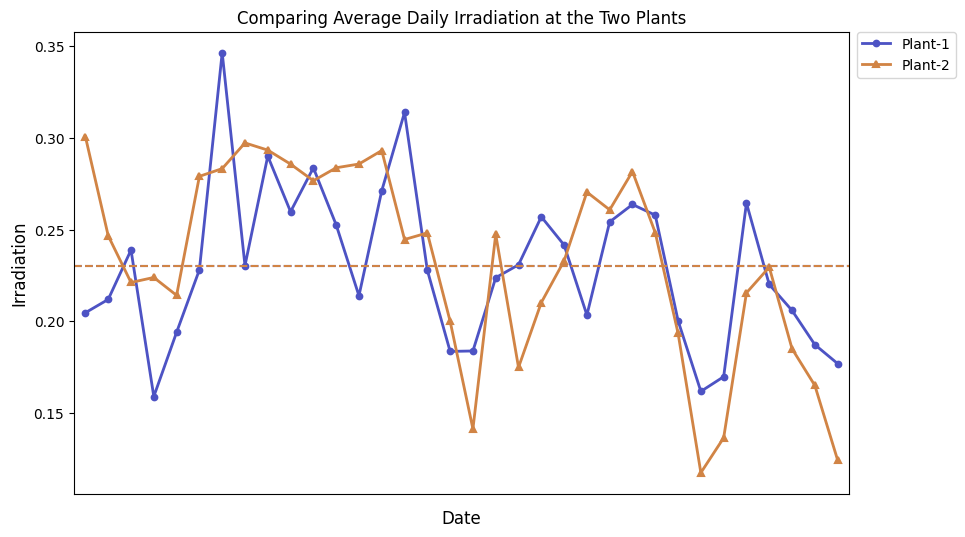

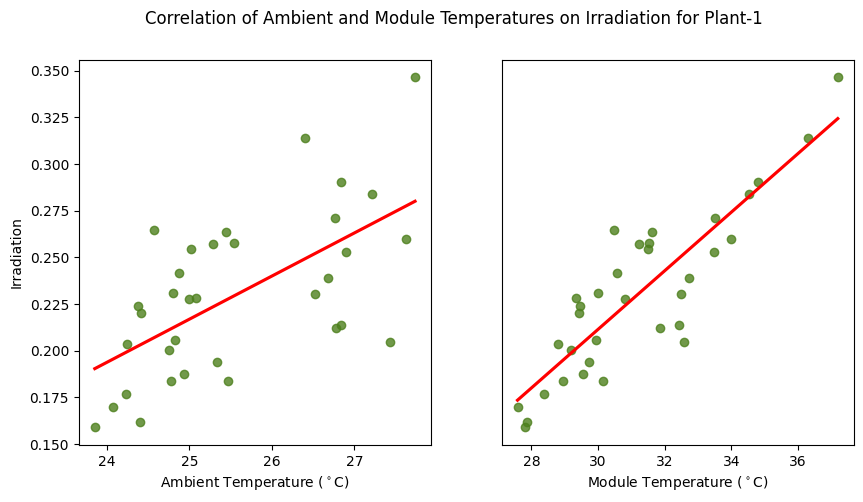

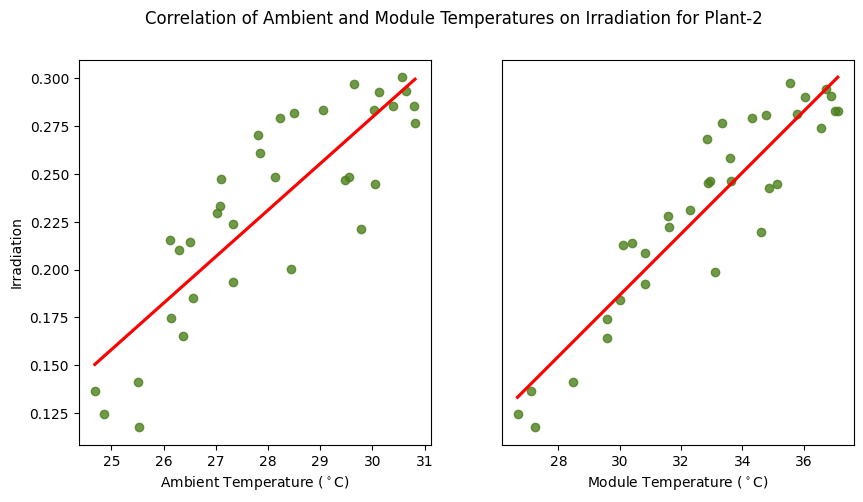

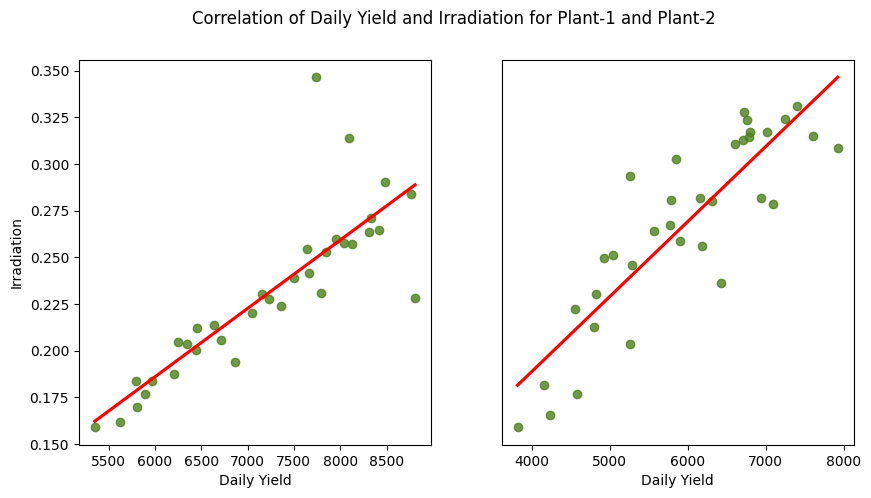

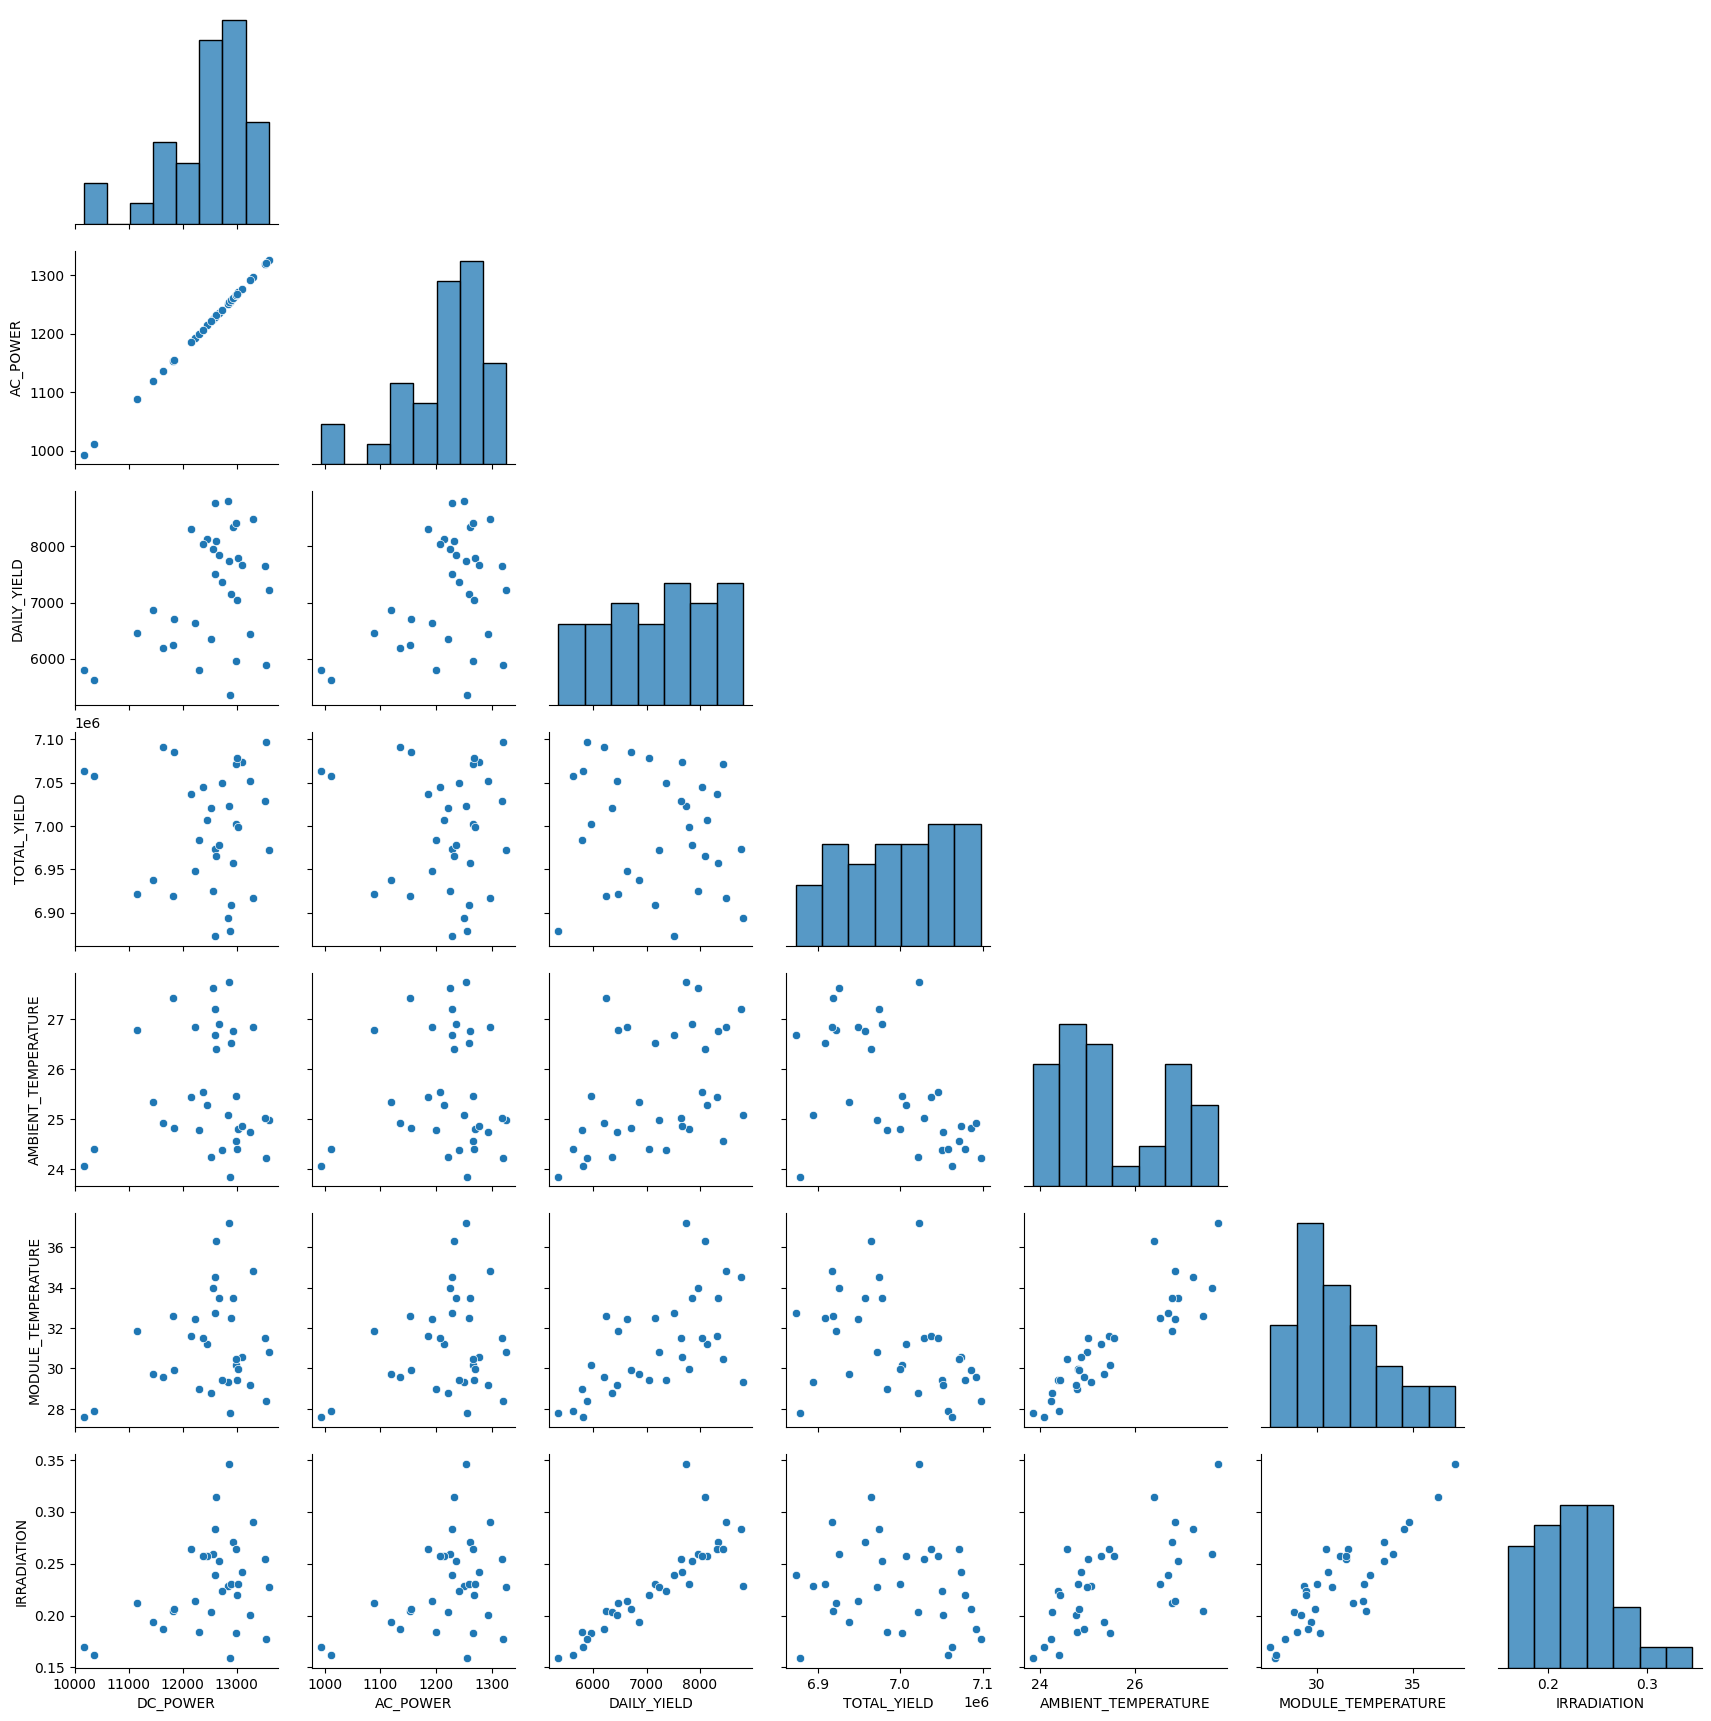

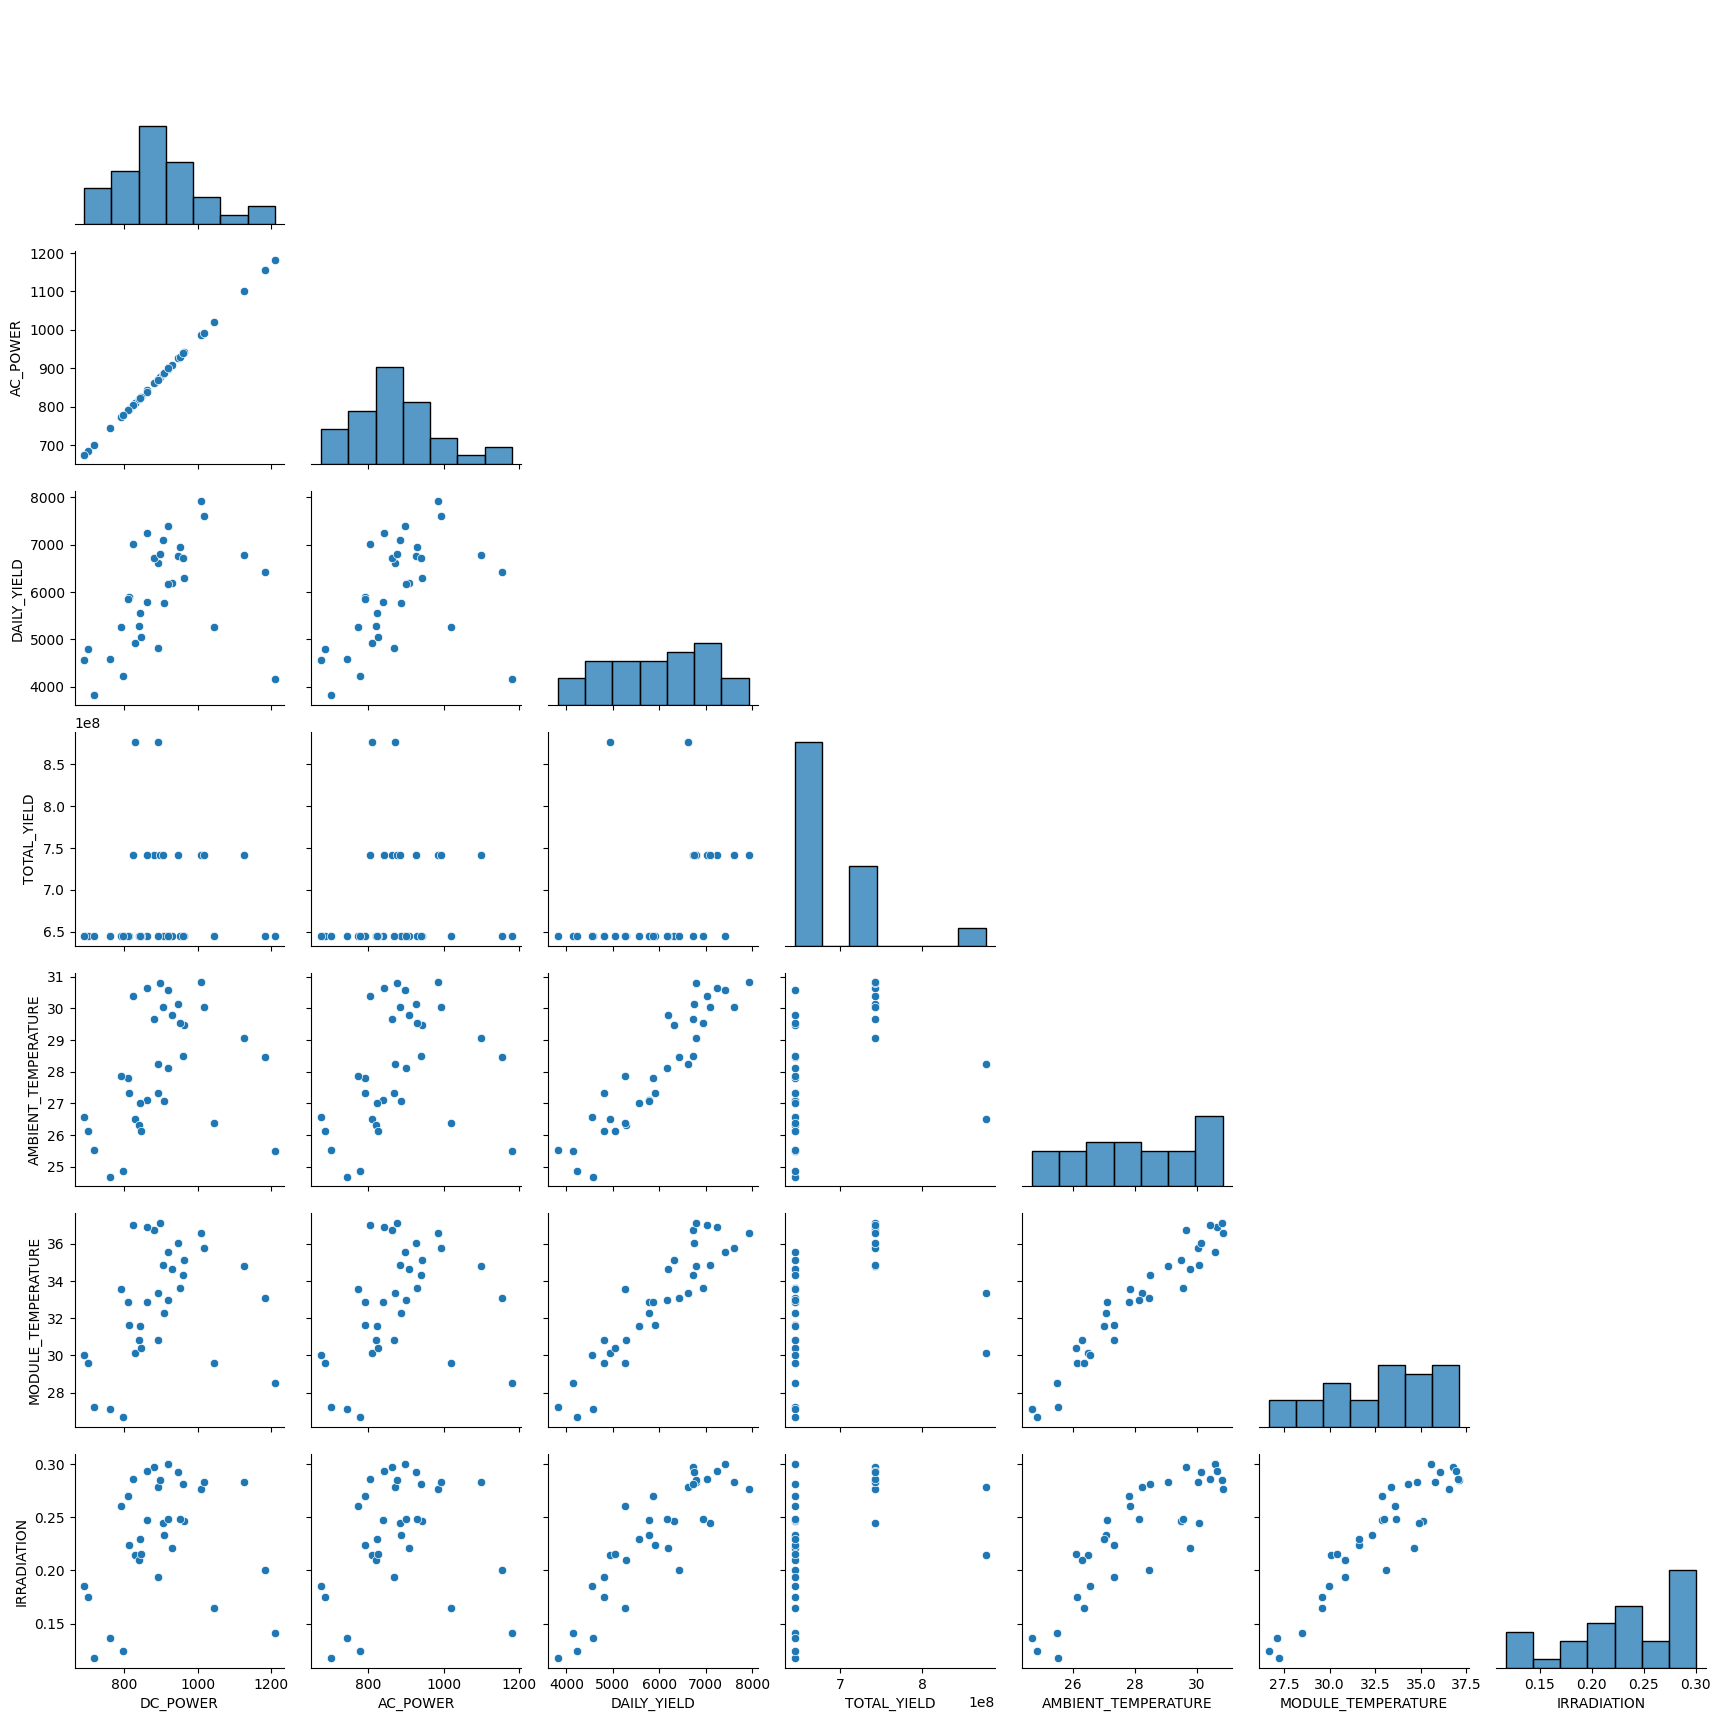

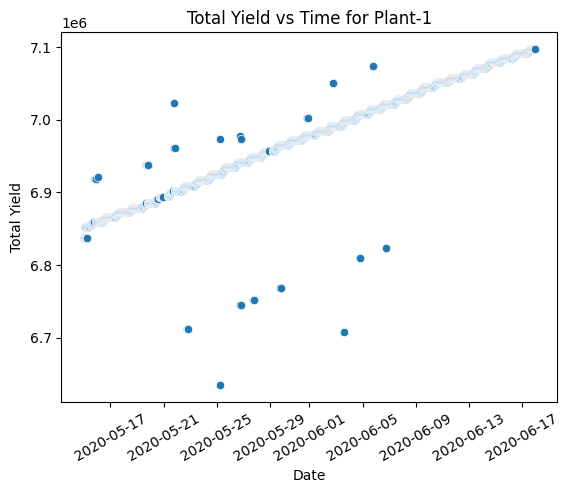

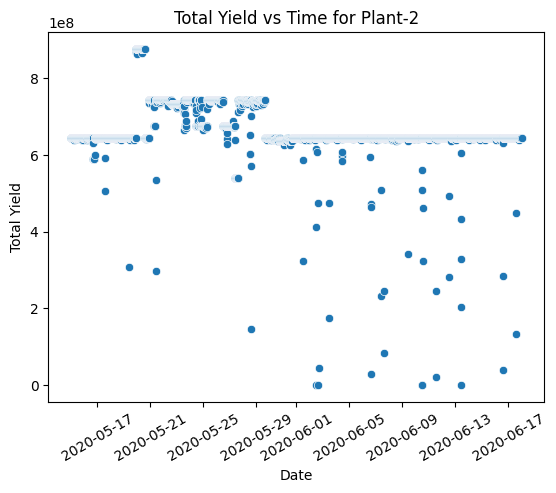

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# -------------------------------------------
# Step 1: Data Upload and Reading the CSV Files
# -------------------------------------------
from google.colab import files
uploaded = files.upload()  # Upload your CSV files from your local machine

# Reading the uploaded CSV files into Pandas DataFrames
df_p1_gen = pd.read_csv('Plant_1_Generation_Data.csv')
df_p1_sens = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
df_p2_gen = pd.read_csv('Plant_2_Generation_Data.csv')
df_p2_sens = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Create lists for easier processing and reference
df_list = [df_p1_gen, df_p1_sens, df_p2_gen, df_p2_sens]
name_list = ['Plant_1_Generation_Data', 'Plant_1_Weather_Sensor_Data',
             'Plant_2_Generation_Data', 'Plant_2_Weather_Sensor_Data']

# -------------------------------------------
# Step 2: Data Inspection and Pre-processing
# -------------------------------------------
for df in df_list:
    print('*')
    # Print dataset dimensions (rows and columns)
    print(f"This dataset has \033[1m{df.shape[0]}\033[0m rows and \033[1m{df.shape[1]}\033[0m columns.")
    print('-------------------------------------------')
    # Display the first two rows for a quick glance at the data
    print(df.head(2))
    print('-------------------------------------------')
    # Print dataframe info (data types and non-null counts)
    print(df.info())
    print("\033[1mNo column contains Null values.\033[0m")
    print('-------------------------------------------')
    # Summary statistics of the dataframe
    print(df.describe())
    print("PLANT_ID has no duplicated and is the primary key.\n\n\n")
    print('\033[1mThe two "Generation" datasets contain identical columns:\033[0m\n')

# Check if the two Generation datasets have identical columns
print(df_p1_gen.columns == df_p2_gen.columns, '\n')
print(df_p1_gen.columns)
print('')
# Check if the two Weather Sensor datasets have identical columns
print('\033[1mThe two "Weather Sensor" datasets contain identical columns:\033[0m\n')
print(df_p1_sens.columns == df_p2_sens.columns, '\n')
print(df_p1_sens.columns)

# Print the data type of the 'DATE_TIME' column
print(f"for all datasets, the 'Date_Time' column has \033[1m{df_p1_gen.dtypes['DATE_TIME']}\033[0m type.")

# Convert 'DATE_TIME' column to proper datetime format:
# First, for the first dataset, we parse it using day-first formatting and then reformat.
df_list[0]['DATE_TIME'] = pd.to_datetime(df_list[0]['DATE_TIME'], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M:%S')
# Now, convert all 'DATE_TIME' columns for each dataset into datetime format
for df in df_list:
    print(df.iloc[0,0])
    df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'])
print(f"\nNow the 'Date_Time' columns in all data sets have \033[1m{df_p1_gen.dtypes['DATE_TIME']}\033[0m format")

# -------------------------------------------
# Additional Pre-processing: Extracting Date and Time
# -------------------------------------------
for df in df_list:
    print(df.iloc[0,0])
    # Loop through each dataset and display start and final date
    for i in range(len(name_list)):
        print(f"{name_list[i]}'s start date is \033[1m{df_list[i].iloc[0].loc['DATE_TIME']}\033[0m and final date is \033[1m{df_list[i].iloc[-1].loc['DATE_TIME']}\033[0m.\n")
    # Group the data by DATE_TIME and print counts for PLANT_ID
    for i in range(len(df_list)):
        print(f"{name_list[i]}: \n-----\n{df_list[i].groupby('DATE_TIME').count()['PLANT_ID'].value_counts()}\n")
    # Create new columns for normalized date and separate time for later use in analysis
    for df in df_list:
        df['DATE'] = df['DATE_TIME'].dt.strftime('%Y-%m-%d')
        df['DATE'] = df['DATE_TIME'].dt.normalize()
        df['TIME'] = df['DATE_TIME'].dt.strftime("%H:%M:%S")
        # Initialize an empty list for grouped data later
        df_group = []

# Grouping data (taking mean for Generation datasets) and creating a list for later use in plotting
df_group = []  # List to hold grouped DataFrames
df_group.append(df_list[0].groupby('DATE_TIME').mean('numeric_only').reset_index())  # Plant 1 Generation
df_group.append(df_list[1])  # Plant 1 Weather Sensor (use raw data)
df_group.append(df_list[2].groupby('DATE_TIME').mean('numeric_only').reset_index())  # Plant 2 Generation
df_group.append(df_list[3])  # Plant 2 Weather Sensor

# Print group counts per DATE_TIME for verification
for i in range(len(df_list)):
    print(f"{name_list[i]}: \n-----\n{df_group[i].groupby('DATE_TIME').count()['PLANT_ID'].value_counts()}\n")
    for df in df_group:
        df['DATE'] = df['DATE_TIME'].dt.strftime('%Y-%m-%d')
        df['DATE'] = df['DATE_TIME'].dt.normalize()

# -------------------------------------------
# Step 3: Data Visualization
# -------------------------------------------
# Concatenate the weather sensor datasets from both plants for comparison
concat_weather = pd.concat([df_group[1], df_group[3]], ignore_index=True)
print(concat_weather.head(3))

# Visualization 1: Distribution of Ambient Temperature for both plants
g = sns.displot(data=concat_weather, x='AMBIENT_TEMPERATURE', kind='kde', hue='PLANT_ID',
                height=3, aspect=3, palette=['#0b57ba','#ba0b0b'])
new_labels = ['Plant-1', 'Plant-2']
g._legend.set_title(None)
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
for text in g._legend.texts:
    text.set_fontsize(13)
# Plot vertical lines for the mean values of ambient temperature for each plant
plt.axvline(df_group[1]['AMBIENT_TEMPERATURE'].mean(), color='#0b57ba', lw=2, ls='--')
plt.axvline(df_group[3]['AMBIENT_TEMPERATURE'].mean(), color='#ba0b0b', lw=2, ls='--')
plt.text(df_group[1]['AMBIENT_TEMPERATURE'].mean() + 0.25, plt.ylim()[1] * 0.9,
         f'{df_group[1]["AMBIENT_TEMPERATURE"].mean():.1f}', color='#0b57ba',
         fontsize=12, fontweight='bold')
plt.text(df_group[3]['AMBIENT_TEMPERATURE'].mean() + 0.25, plt.ylim()[1] * 0.9,
         f'{df_group[3]["AMBIENT_TEMPERATURE"].mean():.1f}', color='#ba0b0b',
         fontsize=12, fontweight='bold')
plt.xlabel('Ambient Temperature ($^\circ$C)')
plt.ylabel('Frequency')
plt.title('Average Daily Ambient Temperature Distribution for the Plants')
plt.show()

# Visualization 2: Distribution of Module Temperature for both plants
g = sns.displot(data=concat_weather, x='MODULE_TEMPERATURE', kind='kde', hue='PLANT_ID',
                height=3, aspect=3, palette=['#0b57ba','#ba0b0b'])
new_labels = ['Plant-1', 'Plant-2']
g._legend.set_title(None)
for t, l in zip(g._legend.texts, new_labels):
    t.set_text(l)
for text in g._legend.texts:
    text.set_fontsize(13)
plt.axvline(df_group[1]['MODULE_TEMPERATURE'].mean(), color='#0b57ba', lw=2, ls='--')
plt.axvline(df_group[3]['MODULE_TEMPERATURE'].mean(), color='#ba0b0b', lw=2, ls='--')
plt.text(df_group[1]['MODULE_TEMPERATURE'].mean() + 0.25, plt.ylim()[1] * 0.9,
         f'{df_group[1]["MODULE_TEMPERATURE"].mean():.1f}', color='#0b57ba',
         fontsize=12, fontweight='bold')
plt.text(df_group[3]['MODULE_TEMPERATURE'].mean() + 0.25, plt.ylim()[1] * 0.8,
         f'{df_group[3]["MODULE_TEMPERATURE"].mean():.1f}', color='#ba0b0b',
         fontsize=12, fontweight='bold')
plt.xlabel('Module Temperature ($^\circ$C)')
plt.ylabel('Frequency')
plt.title('Average Daily Module Temperature Distribution for the Plants')
plt.show()

# -------------------------------------------
# Step 4: Daily Aggregations and Correlation Analysis
# -------------------------------------------
# Group data by date and compute daily averages for temperature readings
df_daily_temp_plant_1 = df_group[1].groupby('DATE').mean('numeric_only').reset_index()
df_daily_temp_plant_2 = df_group[3].groupby('DATE').mean('numeric_only').reset_index()

# Display first two rows to verify
print(df_daily_temp_plant_1.head(2))
# Compute and print the correlation between ambient and module temperatures for Plant-1
print(f"Correlation factor for ambient and module temperature for Plant-1 are: {round(df_daily_temp_plant_1['AMBIENT_TEMPERATURE'].corr(df_daily_temp_plant_1['MODULE_TEMPERATURE']),3)}")

# Visualization 3: Time-series plot for Plant-1's daily ambient and module temperatures
plt.figure(figsize=(10, 6))
fig = sns.pointplot(data=df_daily_temp_plant_1, x='DATE', y='AMBIENT_TEMPERATURE', color='#4d53c4', label='Ambient Temp', scale=0.75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
fig.set(xticklabels=[])  # Remove x-axis labels for clarity
fig.tick_params(bottom=False)
fig = sns.pointplot(data=df_daily_temp_plant_1, x='DATE', y='MODULE_TEMPERATURE', color='#d18445', label='Module Temp', markers='^', scale=0.75)
fig.set(xticklabels=[])
fig.tick_params(bottom=False)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Temperature ($^\circ$C)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('"Plant-1" Average Daily Module and Ambient Temperatures')
# Add dashed lines for average temperatures
plt.axhline(y = round(np.average(df_daily_temp_plant_1['AMBIENT_TEMPERATURE']),2), color = '#4d53c4', linestyle = 'dashed')
plt.axhline(y = round(np.average(df_daily_temp_plant_1['MODULE_TEMPERATURE']),2), color = '#d18445', linestyle = 'dashed')
# Add text annotations for average values
plt.text(28, 26, f"{round(np.average(df_daily_temp_plant_1['AMBIENT_TEMPERATURE']),1)}($^\circ$C)", fontsize = 14,color='#4d53c4')
plt.text(28, 31.5, f"{round(np.average(df_daily_temp_plant_1['MODULE_TEMPERATURE']),1)}($^\circ$C)", fontsize = 14,color='#d18445')
plt.show()

# Repeat time-series analysis for Plant-2
print(f"Correlation factor for ambient and module temperatures for Plant-2 are: {round(df_daily_temp_plant_2['AMBIENT_TEMPERATURE'].corr(df_daily_temp_plant_2['MODULE_TEMPERATURE']),3)}")
plt.figure(figsize=(10, 6))
fig = sns.pointplot(data=df_daily_temp_plant_2, x='DATE', y='AMBIENT_TEMPERATURE', color='#4d53c4', label='Ambient Temp', scale=0.75)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
fig.set(xticklabels=[])
fig.tick_params(bottom=False)
fig = sns.pointplot(data=df_daily_temp_plant_2, x='DATE', y='MODULE_TEMPERATURE', color='#d18445', label='Module Temp', markers='^', scale=0.75)
fig.set(xticklabels=[])
fig.tick_params(bottom=False)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Temperature ($^\circ$C)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('"Plant-2" Average Daily Module and Ambient Temperatures')
plt.axhline(y = round(np.average(df_daily_temp_plant_2['AMBIENT_TEMPERATURE']),2), color = '#4d53c4', linestyle = 'dashed')
plt.axhline(y = round(np.average(df_daily_temp_plant_2['MODULE_TEMPERATURE']),2), color = '#d18445', linestyle = 'dashed')
plt.text(28, 28.5, f"{round(np.average(df_daily_temp_plant_2['AMBIENT_TEMPERATURE']),1)}($^\circ$C)", fontsize = 14,color='#4d53c4')
plt.text(28, 33, f"{round(np.average(df_daily_temp_plant_2['MODULE_TEMPERATURE']),1)}($^\circ$C)", fontsize = 14,color='#d18445')
plt.show()

# -------------------------------------------
# Step 5: Analysis of Power Data and Yield Comparison
# -------------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
fig.suptitle('Average Daily AC and DC Power')

# For Plant-1: Plot daily average AC and DC power
sns.lineplot(ax=axes[0], data = df_group[0].groupby('DATE').mean().reset_index(), x='DATE', y='AC_POWER', errorbar=None, color = '#0b57ba', label='AC Power')
sns.lineplot(ax=axes[0], data = df_group[0].groupby('DATE').mean().reset_index(), x='DATE', y='DC_POWER', errorbar=None, color = '#ba0b0b', label='DC Power')
# Highlight potential anomalies in DC power data with annotations
axes[0].text(x=0.5, y=0.6, s='x', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, color='r', fontsize=150)
axes[0].text(x=0.5, y=0.3, s='Potentially error in DC Power data', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes, color='r', fontsize=15)
axes[0].set_title("Plant-1")
axes[0].set_xticklabels([])
axes[0].set_xticks([])
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Average Daily Power')

# For Plant-2: Plot daily average AC and DC power
sns.lineplot(ax=axes[1], data = df_group[2].groupby('DATE').mean().reset_index(), x='DATE', y='AC_POWER', errorbar=None, color = '#0b57ba', label='AC Power')
sns.lineplot(ax=axes[1], data = df_group[2].groupby('DATE').mean().reset_index(), x='DATE', y='DC_POWER', errorbar=None, color = '#ba0b0b', label='DC Power')
plt.xticks(rotation=30)
axes[1].set_xlabel('Date')
axes[1].set_ylabel(None)
axes[1].set_title("Plant-2")
axes[1].set_xticklabels([])
axes[1].set_xticks([])
plt.title('Plant-2')
plt.show()

# Calculate maximum daily yield for each plant
df_daily_yield = [
    df_group[0].groupby('DATE').max('DAILY_YIELD').reset_index(),
    df_group[2].groupby('DATE').max('DAILY_YIELD').reset_index()
]
print(f"Average daily yield for Plant-1 is: {round(np.average(df_daily_yield[0]['DAILY_YIELD']),2)}")
print(f"Average daily yield for Plant-2 is: {round(np.average(df_daily_yield[1]['DAILY_YIELD']),2)}")
print(f"The average daily yield for Plant-1 is {round((np.average(df_daily_yield[0]['DAILY_YIELD'])-np.average(df_daily_yield[1]['DAILY_YIELD']))/(np.average(df_daily_yield[1]['DAILY_YIELD'])),2)*100}% higher than Plant-2")

# Visualization 4: Comparing daily yields of both plants with average yield lines
plt.figure(figsize=(10, 6))
fig = sns.pointplot(data=df_daily_yield[0], x='DATE', y='DAILY_YIELD', color='#4d53c4', label='Plant-1', scale=0.75)
fig = sns.pointplot(data=df_daily_yield[1], x='DATE', y='DAILY_YIELD', color='#d18445', label='Plant-2', markers='^', scale=0.75)
fig.set(xticklabels=[])
plt.axhline(y = round(np.average(df_daily_yield[0]['DAILY_YIELD']),2), color = '#4d53c4', linestyle = 'dashed')
plt.axhline(y = round(np.average(df_daily_yield[1]['DAILY_YIELD']),2), color = '#d18445', linestyle = 'dashed')
plt.text(30, 7300, f"{round(np.average(df_daily_yield[0]['DAILY_YIELD']),1)}", fontsize = 14, color='#4d53c4')
plt.text(30, 6050, f"{round(np.average(df_daily_yield[1]['DAILY_YIELD']),1)}", fontsize = 14, color='#d18445')
fig.tick_params(bottom=False)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Maximum Daily Yields', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Maximum Daily Yields of the Two Plants; The Dashed Lines Show the Average')
plt.show()

# -------------------------------------------
# Step 6: Correlation Analysis: Temperature vs. Yield and Irradiation
# -------------------------------------------
# Correlation between ambient/module temperatures and daily yield for Plant-1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Correlation of Ambient and Module Temperatures on Daily Yield for Plant-1')
sns.regplot(ax=axes[0], x=df_daily_temp_plant_1['AMBIENT_TEMPERATURE'], y=df_daily_yield[0]['DAILY_YIELD'], line_kws=dict(color="#4d801d"), color="#0b57ba", ci=None)
axes[0].set_xlabel('Ambient Temperature ($^\circ$C)')
axes[0].set_ylabel('Daily Yield')
sns.regplot(ax=axes[1], x=df_daily_temp_plant_1['MODULE_TEMPERATURE'], y=df_daily_yield[0]['DAILY_YIELD'], line_kws=dict(color="#4d801d"), color="#0b57ba", ci=None)
axes[1].set_xlabel('Module Temperature ($^\circ$C)')
axes[1].get_yaxis().set_visible(False)
plt.show()

# Correlation for Plant-2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Correlation of Ambient and Module Temperatures on Daily Yield for Plant-2')
sns.regplot(ax=axes[0], x=df_daily_temp_plant_2['AMBIENT_TEMPERATURE'], y=df_daily_yield[1]['DAILY_YIELD'], line_kws=dict(color="#4d801d"), color="#ba0b0b", ci=None)
axes[0].set_xlabel('Ambient Temperature ($^\circ$C)')
axes[0].set_ylabel('Daily Yield')
sns.regplot(ax=axes[1], x=df_daily_temp_plant_2['MODULE_TEMPERATURE'], y=df_daily_yield[1]['DAILY_YIELD'], line_kws=dict(color="#4d801d"), color="#ba0b0b", ci=None)
axes[1].set_xlabel('Module Temperature ($^\circ$C)')
axes[1].get_yaxis().set_visible(False)
plt.show()

# Print correlation coefficients for further insight
print('Plant-1')
print('-----')
print(f"Correlation between daily yield and ambient temperature: {round(df_daily_yield[0]['DAILY_YIELD'].corr(df_daily_temp_plant_1['AMBIENT_TEMPERATURE']),3)}")
print(f"Correlation between daily yield and module temperature: {round(df_daily_yield[0]['DAILY_YIELD'].corr(df_daily_temp_plant_1['MODULE_TEMPERATURE']),3)}")
print('Plant-2')
print('-----')
print(f"Correlation between daily yield and ambient temperature: {round(df_daily_yield[1]['DAILY_YIELD'].corr(df_daily_temp_plant_2['AMBIENT_TEMPERATURE']),3)}")
print(f"Correlation between daily yield and module temperature: {round(df_daily_yield[1]['DAILY_YIELD'].corr(df_daily_temp_plant_2['MODULE_TEMPERATURE']),3)}")

# Visualization: Comparing Average Daily Irradiation for both plants
plt.figure(figsize=(10, 6))
fig = sns.pointplot(data=df_daily_temp_plant_1, x='DATE', y='IRRADIATION', color='#4d53c4', label='Plant-1', scale=0.75)
fig = sns.pointplot(data=df_daily_temp_plant_2, x='DATE', y='IRRADIATION', color='#d18445', label='Plant-2', markers='^', scale=0.75)
fig.set(xticklabels=[])
fig.tick_params(bottom=False)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.ylabel('Irradiation', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Comparing Average Daily Irradiation at the Two Plants')
plt.axhline(y = round(np.average(df_daily_temp_plant_1['IRRADIATION']),2), color = '#4d53c4', linestyle = 'dashed')
plt.axhline(y = round(np.average(df_daily_temp_plant_2['IRRADIATION']),2), color = '#d18445', linestyle = 'dashed')
plt.show()

# Correlation of Temperature with Irradiation for Plant-1
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Correlation of Ambient and Module Temperatures on Irradiation for Plant-1')
sns.regplot(ax=axes[0], x=df_daily_temp_plant_1['AMBIENT_TEMPERATURE'], y=df_daily_temp_plant_1['IRRADIATION'], line_kws=dict(color="r"), color="#4d801d", ci=None)
axes[0].set_xlabel('Ambient Temperature ($^\circ$C)')
axes[0].set_ylabel('Irradiation')
sns.regplot(ax=axes[1], x=df_daily_temp_plant_1['MODULE_TEMPERATURE'], y=df_daily_temp_plant_1['IRRADIATION'], line_kws=dict(color="r"), color="#4d801d", ci=None)
axes[1].set_xlabel('Module Temperature ($^\circ$C)')
axes[1].get_yaxis().set_visible(False)
plt.show()

# Correlation of Temperature with Irradiation for Plant-2
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Correlation of Ambient and Module Temperatures on Irradiation for Plant-2')
sns.regplot(ax=axes[0], x=df_daily_temp_plant_2['AMBIENT_TEMPERATURE'], y=df_daily_temp_plant_2['IRRADIATION'], line_kws=dict(color="r"), color="#4d801d", ci=None)
axes[0].set_xlabel('Ambient Temperature ($^\circ$C)')
axes[0].set_ylabel('Irradiation')
sns.regplot(ax=axes[1], x=df_daily_temp_plant_2['MODULE_TEMPERATURE'], y=df_daily_temp_plant_2['IRRADIATION'], line_kws=dict(color="r"), color="#4d801d", ci=None)
axes[1].set_xlabel('Module Temperature ($^\circ$C)')
axes[1].get_yaxis().set_visible(False)
plt.show()

# Correlation between Daily Yield and Irradiation for both plants
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.suptitle('Correlation of Daily Yield and Irradiation for Plant-1 and Plant-2')
sns.regplot(ax=axes[0], x=df_daily_yield[0]['DAILY_YIELD'], y=df_daily_temp_plant_1['IRRADIATION'], line_kws=dict(color="r"), color="#4d801d", ci=None)
axes[0].set_xlabel('Daily Yield')
axes[0].set_ylabel('Irradiation')
sns.regplot(ax=axes[1], x=df_daily_yield[1]['DAILY_YIELD'], y=df_daily_temp_plant_2['IRRADIATION'], line_kws=dict(color="r"), color="#4d801d", ci=None)
axes[1].set_xlabel('Daily Yield')
axes[1].get_yaxis().set_visible(False)
plt.show()

# -------------------------------------------
# Step 7: Merging Datasets for Pairwise Analysis
# -------------------------------------------
# Merge daily yield and temperature data for Plant-1 and remove redundant columns
df_merged_plant_1 = pd.merge(left=df_daily_yield[0], right=df_daily_temp_plant_1, how='inner', left_on='DATE', right_on='DATE')
df_merged_plant_1.drop(['PLANT_ID_x','PLANT_ID_y'], axis=1, inplace=True)
sns.pairplot(data=df_merged_plant_1, corner=True)
plt.show()

# Merge daily yield and temperature data for Plant-2 and remove redundant columns
df_merged_plant_2 = pd.merge(left=df_daily_yield[1], right=df_daily_temp_plant_2, how='inner', left_on='DATE', right_on='DATE')
df_merged_plant_2.drop(['PLANT_ID_x','PLANT_ID_y'], axis=1, inplace=True)
sns.pairplot(data=df_merged_plant_2, corner=True)
plt.show()

# -------------------------------------------
# Step 8: Total Yield Over Time Analysis
# -------------------------------------------
# Plot total yield vs. time for Plant-1
sns.scatterplot(y = df_group[0]['TOTAL_YIELD'], x=df_group[0]['DATE_TIME'])
plt.ylabel('Total Yield')
plt.xlabel('Date')
plt.title('Total Yield vs Time for Plant-1')
plt.tick_params(axis='x', rotation=30)
plt.show()

# Plot total yield vs. time for Plant-2
sns.scatterplot(y = df_group[2]['TOTAL_YIELD'], x=df_group[2]['DATE_TIME'])
plt.ylabel('Total Yield')
plt.xlabel('Date')
plt.title('Total Yield vs Time for Plant-2')
plt.tick_params(axis='x', rotation=30)
plt.show()
